# **Customer Churn Analysis** <br>
<br>
<b>Problem Statement:</b>

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.<br>
<br>
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.<br>
<br>
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.<br> 
<br>
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. <br>

In [6]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# import file

data = pd.read_csv('/content/sample_data/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **EDA**

In [8]:
# check shape

data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 - Out of 21 columns we have 1 float type and 2 int type and rest are all object type.

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here, we get some idea like : 
 - Mean monthly charged 64.76 units and 75% of observation charged 89.85 units.
 - Max tenure is 72 mnths and mean is 32 mnths.
 - About 50% of customers stays for 29 mnths and charged around 70.3/mnth.

# **Visualisation**
## **Churn**

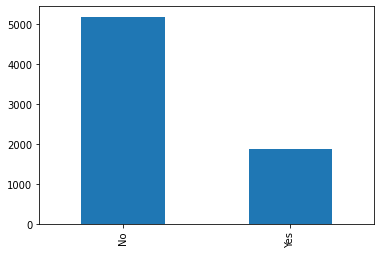

In [11]:
# plot graph

data['Churn'].value_counts().head().plot.bar()

([<matplotlib.patches.Wedge at 0x7fde82409ad0>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

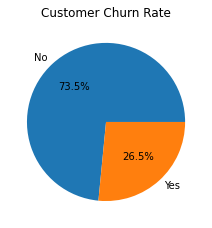

In [12]:
# let's see in pie chart
sizes = data['Churn'].value_counts(sort=True)
labels = np.unique(data.Churn)

plt.figure(figsize=(8,8))
plt.subplot(212)
plt.title('Customer Churn Rate')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

 - By both plots I can say that no. of cuatomers churn is less than half of not churned.

### **Convert object type into numeric**

In [13]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Check null**

In [15]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 - It has only one column "TotalCharges" which has 11 null values.

## **TotalCharges**

In [16]:
# handeling TotalCharges        
data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

## **customerID**

In [17]:
# drop customerID column as it is of no use.

data.drop(['customerID'], axis=1, inplace=True)

In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 - Column has been dropped successfully.
 

In [19]:
# check null again
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 - Our data don't have any null values now.

## **Categorical Features**

In [20]:
data.gender = [1 if i=='Male' else 0 for i in data.gender]

for col in ('Partner',	'Dependents', 'PhoneService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'PaperlessBilling', 'MultipleLines', 'Churn') :
          
          data[col] = [1 if i=='Yes' else 0 for i in data[col]]
 

In [21]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [22]:
# check correlation

data.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

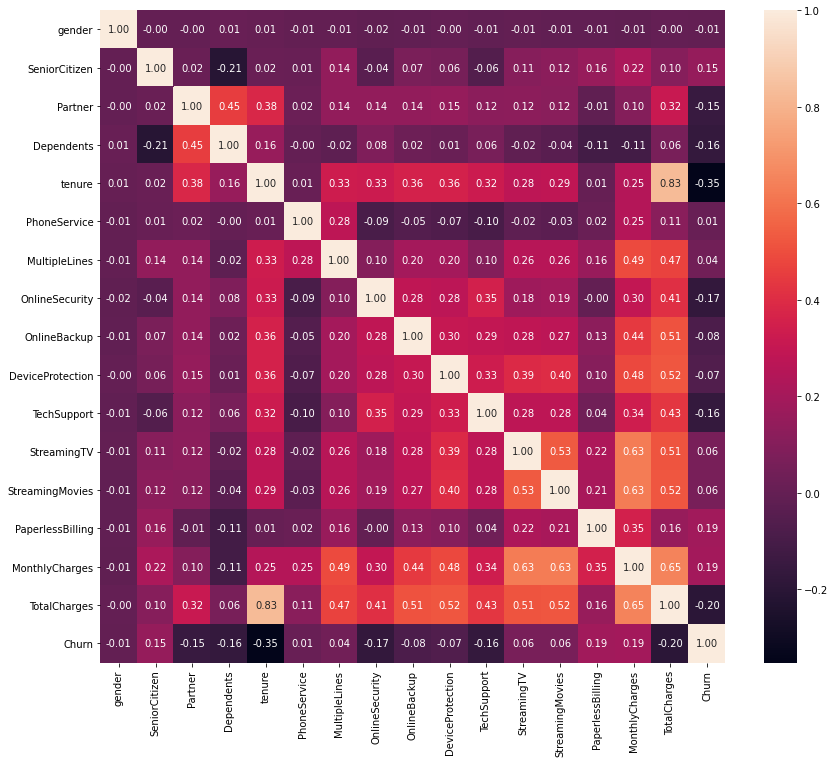

In [29]:
# plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')

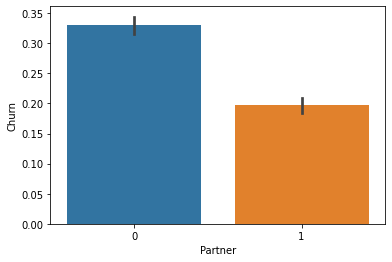

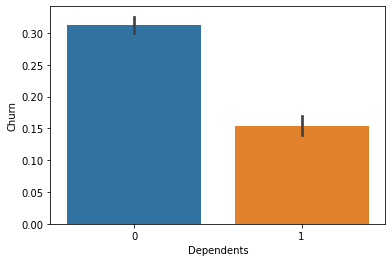

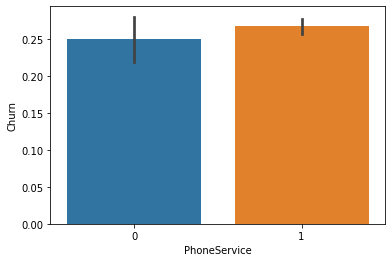

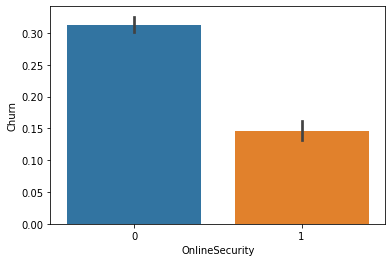

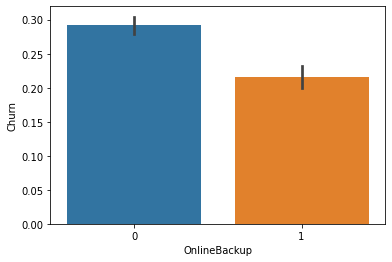

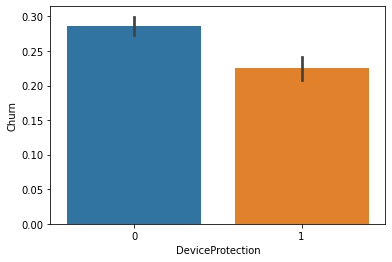

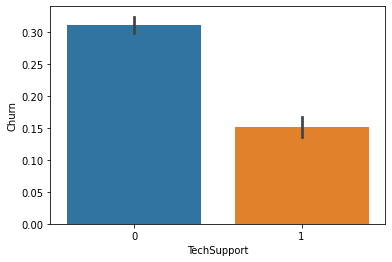

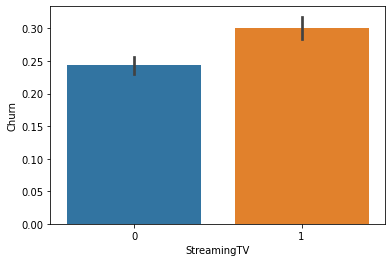

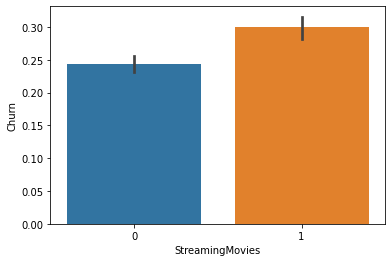

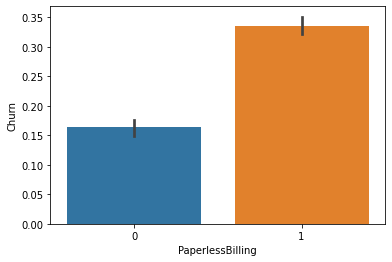

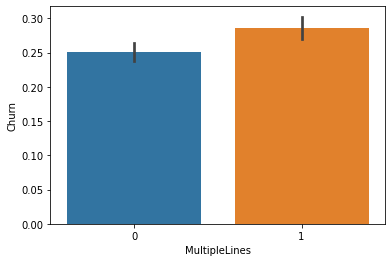

In [27]:
# plot categorical column w.r.t target column.

for col in ('Partner',	'Dependents', 'PhoneService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'PaperlessBilling', 'MultipleLines') :
   sns.barplot(x=col, y='Churn', data=data)
   plt.show()

 - Above plots shows the churn of each catergorical feature.

## **Numeric Features**

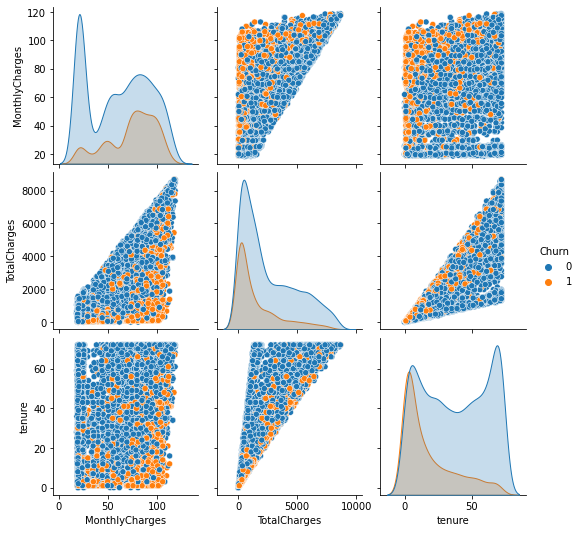

In [35]:
# pair plot for all features

highCorrCol = ['MonthlyCharges',	'TotalCharges', 'tenure', 'Churn']
sns.pairplot(data[highCorrCol], hue='Churn')

 - Each categorical plot shows there is higher churning rate in any of its category.
 - Customer with 2year contract and No internet service have least churn rate.
 - When monthly charges are less, churn rate is less.
 - Churn rate is hogher for customers with MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,PhoneService.
 - Churn rate is less for customers having no PhoneService,OnlineService,OnlineBackup,DeviceProtecion,TechSuppot.

## **Model Building**


In [53]:
# terget variable
y = data.Churn.values


AttributeError: ignored

In [57]:
X = data

In [58]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [59]:
# all features except target variable
pd.get_dummies(data)
X = data.drop(['Churn'], axis=1, inplace=True)

KeyError: ignored

In [51]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.neural_network import MLPClassifier

In [60]:
# split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=152485)

## **Random Forest Classifier**

In [62]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')
rf = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Mean Squared Error', mean_squared_error(y_test,rf_pred))
print('Accuracy Score', accuracy_score(y_test,rf_pred))

Mean Squared Error 0.20539517274017985
Accuracy Score 0.7946048272598202


## **Logistic Regression**

In [65]:
lr = LogisticRegression(C=1)
lr = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Mean Squared Error', mean_squared_error(y_test,lr_pred))
print('Accuracy Score', accuracy_score(y_test,lr_pred))

Mean Squared Error 0.19167061050638903
Accuracy Score 0.808329389493611


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **SVC**

In [66]:
svc = SVC(kernel='rbf')
svc = svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print('Mean Squared Error', mean_squared_error(y_test,svc_pred))
print('Accuracy Score', accuracy_score(y_test,svc_pred))

Mean Squared Error 0.25982016090866067
Accuracy Score 0.7401798390913393


## **MLPClassifier**

In [68]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=45152155)
mlp = mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print('Mean Squared Error', mean_squared_error(y_test, mlp_pred))
print('Accuracy Score', accuracy_score(y_test, mlp_pred))


Mean Squared Error 0.25982016090866067
Accuracy Score 0.7401798390913393


 - LogisticRegression gives better accuracy which is 80%.

# **Save the model**

In [70]:
import joblib

joblib.dump(lr, 'Customer_Churn_Analysis.pkl')
lr = joblib.load('Customer_Churn_Analysis.pkl')